In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Data visualization library
import seaborn as sns
import matplotlib.pyplot as plt
#import data filter warning library
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data using URL from GITHUB
url = 'https://raw.githubusercontent.com/vrushali253/SUPPLYCHAINY/refs/heads/main/SCM%20-%20SCM.csv'
df = pd.read_csv(url)
df.sample(frac = 1) # data shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
3142,WH_103142,EID_53142,Rural,Large,North,Zone 5,5,0,3,4487,...,1,238,27.0,2018.0,6,1,B,3,25,8128
9510,WH_109510,EID_59510,Rural,Large,North,Zone 6,3,1,2,6682,...,0,100,38.0,2016.0,7,0,B+,5,6,9068
19602,WH_119602,EID_69602,Urban,Small,West,Zone 6,4,3,2,4876,...,1,192,20.0,NaN,24,1,A+,4,9,31056
16628,WH_116628,EID_66628,Rural,Large,North,Zone 6,4,0,2,4761,...,1,176,NaN,2017.0,5,0,A,5,23,7089
15115,WH_115115,EID_65115,Rural,Mid,West,Zone 4,6,3,3,8946,...,1,125,29.0,NaN,25,1,C,4,26,33119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,WH_100451,EID_50451,Rural,Mid,West,Zone 4,6,0,2,5156,...,1,225,25.0,2017.0,17,0,A,1,11,24102
14385,WH_114385,EID_64385,Rural,Large,North,Zone 5,0,0,3,3759,...,1,240,23.0,NaN,20,0,B,5,5,25072
17322,WH_117322,EID_67322,Urban,Mid,South,Zone 4,2,0,3,7815,...,0,76,35.0,NaN,34,0,A,3,26,44067
814,WH_100814,EID_50814,Rural,Large,North,Zone 6,8,0,4,5974,...,1,107,38.0,NaN,24,0,C,3,29,30069


In [3]:
# Checking dataset  information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
df.describe() # data is non normally distributed since mean not equal to median

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


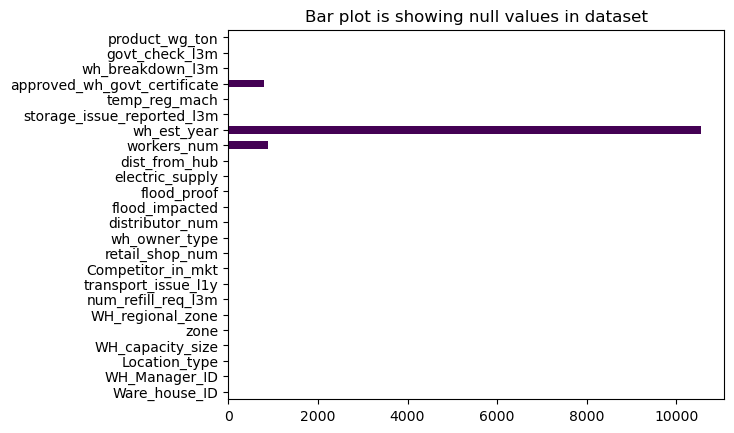

In [5]:
# checking null values in dataset
df.isnull().sum().plot(kind = 'barh',cmap = 'viridis')
plt.title('Bar plot is showing null values in dataset')
plt.show()

In [6]:
#calculate missing value percentage
(df['approved_wh_govt_certificate'].isnull().sum() / len(df['approved_wh_govt_certificate'])) * 100

3.6343115124153504

In [7]:
# calculate missing value percentage of wh est year
(df['wh_est_year'].isnull().sum() / len(df['wh_est_year'])) * 100

47.60722347629797

In [8]:
df['wh_est_year'].value_counts().head(10)

wh_est_year
2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: count, dtype: int64

In [9]:
df['wh_est_year'].quantile(0.5),df['wh_est_year'].quantile(0.25)

(2009.0, 2003.0)

In [10]:
df['wh_est_year'].median()

2009.0

In [11]:
df['wh_est_year'].mean()

2009.4012063765617

In [12]:
# imputing the missing value column
df['wh_est_year'].fillna(2009, inplace = True)

In [13]:
df['approved_wh_govt_certificate'].fillna('C',inplace = True)

In [14]:
df['workers_num'].isnull().sum() / len(df['workers_num'])*100

3.959367945823928

In [15]:
df['workers_num'].median(),df['workers_num'].mean()

(28.0, 28.93639825130447)

In [16]:
df['workers_num'].quantile(0.75),df['workers_num'].quantile(0.25)

(33.0, 24.0)

In [17]:
df['workers_num'].fillna(28, inplace = True)

In [18]:
# checking if any null value present in the data
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [19]:
# Seperate categorical and numerical columns

In [20]:
categorical_columns = df.select_dtypes(include = 'object')

In [21]:
numerical_columns = df.select_dtypes(exclude = 'object')

In [22]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [23]:
# drop unnecessary columns
df.drop(columns = ['Ware_house_ID','WH_Manager_ID'], axis = 1, inplace = True)

In [24]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [25]:
# eveluate the data for west zone
westzone = df[df['zone'] == 'West']
westzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2009.0,13,0,A,5,15,17115
5,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,...,1,77,27.0,2010.0,24,0,B,3,6,30142
14,Rural,Small,West,Zone 6,8,1,4,5022,Rented,68,...,1,129,37.0,2009.0,6,0,B,3,9,7055
16,Rural,Mid,West,Zone 4,0,0,2,5569,Company Owned,16,...,1,231,28.0,2009.0,9,0,B+,5,11,12127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,Rural,Large,West,Zone 6,8,0,4,4687,Rented,62,...,1,160,26.0,2005.0,32,0,B,3,23,40086
22138,Rural,Mid,West,Zone 4,7,0,3,4686,Company Owned,55,...,1,148,28.0,2010.0,23,0,B+,6,11,29130
22139,Rural,Mid,West,Zone 3,5,0,4,3771,Rented,66,...,0,97,30.0,1998.0,24,0,C,2,19,30102
22140,Rural,Large,West,Zone 5,7,0,4,4593,Rented,18,...,1,78,24.0,2008.0,18,0,B+,6,14,21128


<Axes: ylabel='count'>

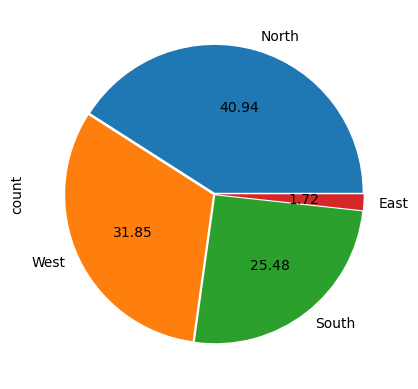

In [26]:
df['zone'].value_counts().plot(kind = 'pie' , autopct = '%1.2f', explode=[0.01,0.01,0.01,0.01])

In [27]:
# eveluate the data for south zone

southzone = df[df['zone'] == 'South']
southzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2009.0,17,0,A,6,22,23137
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,...,0,78,43.0,2009.0,6,0,C,6,2,7130
13,Rural,Mid,South,Zone 4,6,1,2,6858,Company Owned,26,...,1,242,36.0,2008.0,22,1,A,5,11,30063
19,Rural,Small,South,Zone 1,1,1,2,5679,Rented,19,...,1,189,24.0,2009.0,22,0,B,2,21,27100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,Rural,Large,South,Zone 5,7,0,2,5114,Company Owned,30,...,0,85,33.0,2009.0,14,0,B,5,10,16063
22135,Urban,Large,South,Zone 5,8,0,4,4312,Rented,19,...,0,194,21.0,2014.0,19,1,A,2,25,26114
22136,Urban,Small,South,Zone 1,3,1,2,5792,Rented,43,...,0,217,21.0,2012.0,19,0,B,2,31,22082
22144,Rural,Small,South,Zone 6,1,2,3,3325,Company Owned,22,...,1,160,37.0,2009.0,9,0,B,5,9,10068


In [28]:
df['Location_type'].value_counts()

Location_type
Rural    20334
Urban     1816
Name: count, dtype: int64

In [29]:
df['WH_capacity_size'].value_counts()

WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: count, dtype: int64

In [30]:
categorical_columns

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [31]:
df['Location_type'].value_counts()

Location_type
Rural    20334
Urban     1816
Name: count, dtype: int64

In [32]:
# converting location type categorical variable to numerical variable using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location_type'] = le.fit_transform(df['Location_type'])


In [33]:
df['Location_type'].value_counts()

Location_type
0    20334
1     1816
Name: count, dtype: int64

In [34]:
df['WH_capacity_size'].value_counts()

WH_capacity_size
Large    8968
Mid      8902
Small    4280
Name: count, dtype: int64

In [35]:
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

In [36]:
df['zone'].value_counts()

zone
North    9069
West     7055
South    5644
East      382
Name: count, dtype: int64

In [38]:
df ['zone'] = le.fit_transform(df['zone'])

In [39]:
df['zone'].value_counts()

zone
1    9069
3    7055
2    5644
0     382
Name: count, dtype: int64

In [ ]:
WH_regional_zone	WH_owner_type	approved_wh_govt_certificate


In [40]:
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

In [41]:
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [42]:
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

In [45]:
#scaling technique are standard,minmax and robust scaler
#if mean not equal minmax
#data non normaly distributed and outliers more than 5% use robust scaler

In [46]:
df.head(10)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
5,0,2,3,0,8,0,2,5053,1,37,...,1,152,35.0,2009.0,23,1,1,3,3,32134
6,0,0,3,5,8,0,4,4449,0,38,...,1,77,27.0,2010.0,24,0,2,3,6,30142
7,0,0,1,4,1,0,4,7183,1,45,...,0,241,23.0,2009.0,18,0,4,6,24,24093
8,0,2,2,5,8,1,4,5381,1,42,...,1,124,22.0,2013.0,13,1,1,5,2,18082
9,0,2,2,5,4,3,3,3869,0,35,...,0,78,43.0,2009.0,6,0,4,6,2,7130
